# New case studies for Robot Dance paper

In [1]:
import os
import datetime
from importlib import reload
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt

import run_robot
import prepare_data
reload(run_robot)

Loading modules...
Loading modules... Ok!
Loading PyJulia module...
Loading PyJulia module... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!
Loading Julia library...
Loading Julia library... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!
Loading modules...
Loading modules... Ok!
Loading Julia library...
Loading Julia library... Ok!
Loading Robot-dance Julia module...
Loading Robot-dance Julia module... Ok!


<module 'run_robot' from '/home/pjssilva/documentos/pesquisa/robot_dance/code/run_robot.py'>

## Define Subnotification factor

Between 21st and 29th of July the city of São Paulo made public the result of a research that [17.9% of its population](https://www1.folha.uol.com.br/equilibrioesaude/2020/08/em-sao-paulo-22-dos-moradores-dos-bairros-mais-pobres-ja-pegaram-coronavirus.shtml) had alredy had Covid-19. Here we use that number to find out a reasonable subnotification factor.

In [2]:
basic_prm = prepare_data.save_basic_parameters(min_level=0.8, rep=2.5, ndays=30)
subnot_factor = 11.6
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Mun. São Paulo"], 10000000, subnot_factor, 1, "data/covid_with_drs_07_29.csv")
cities_data




 1/1 Mun. São Paulo                 Mean effective R in the last two weeks = 1.06


S1      E1        I1        R1  population  \
Mun. São Paulo  0.803731  0.0114  0.005935  0.178934  11869660.0   

                icu_capacity  start_date  
Mun. São Paulo      0.000296  2020-07-29

Now, we define some important decisions:

* The basic reproduction rate (R0). The original literature and our own estimates suggest 2.5. But this value seems high nowdays when people are wearing masks, have learned stricter hygiene habits (more hand wahing), and do basic social distancing. I am trying now with 1.8.

* Horizon of simulation: we use a little more than one year because after that we should probably have a vacine and the game changes completely.

* Mean stay in ICU: mean time in ICU, it will also be used to select the right time series to estimate the number of ICU needed below. We are using 7.

* Lockdown level: what is the reproduction level achievable by a strict lockdown. We are using 0.8. Should be smaller than 1.

In [3]:
# Define the basic data for the case studies

# Basic reproduction number
basic_rep = 1.8

# Simulation horizon
# A little more than a year when thevaccine should be here
ndays = 14*2*14

# Mean time in ICU
time_icu = 7

# Lockdown level
lock_level = 0.8

# Define basic paramters
basic_prm = prepare_data.save_basic_parameters(min_level=lock_level, rep=basic_rep, time_icu=time_icu, ndays=ndays)

# Compute initial values

# For cities
# cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["Araçatuba", "São José Do Rio Preto"], 500000, 1)
# cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", ["São José Do Rio Preto"], 25000, 6, 1)

# For DRS
cities_data = prepare_data.compute_initial_condition_evolve_and_save(basic_prm, "SP", [], 000000, subnot_factor, 1, "data/covid_with_drs_07_01.csv")

# Sub-groups for figures
sp = ["Mun. São Paulo"]
sp_so = sp + ["Sub região sudoeste - RMSP"]
rmsp = sp + ["Sub região leste - RMSP", "Sub região norte - RMSP", "Sub região oeste - RMSP", "Sub região sudeste - RMSP", "Sub região sudoeste - RMSP"]


 1/22 Araraquara                     Mean effective R in the last two weeks = 1.21
 2/22 Araçatuba                      Mean effective R in the last two weeks = 1.80
 3/22 Baixada Santista               Mean effective R in the last two weeks = 1.03
 4/22 Barretos                       Mean effective R in the last two weeks = 1.49
 5/22 Bauru                          Mean effective R in the last two weeks = 1.57
 6/22 Campinas                       Mean effective R in the last two weeks = 1.39
 7/22 Franca                         Mean effective R in the last two weeks = 1.76
 8/22 Marília                        Mean effective R in the last two weeks = 1.46
 9/22 Mun. São Paulo                 Mean effective R in the last two weeks = 1.00
10/22 Piracicaba                     Mean effective R in the last two weeks = 1.43
11/22 Presidente Prudente            Mean effective R in the last two weeks = 2.07
12/22 Registro                       Mean effective R in the last two weeks = 1.44
13/

In [4]:
# Create a target matrix (max infected level)
ncities, ndays = len(cities_data.index), int(basic_prm["ndays"])
target = 0.8*np.ones((ncities, ndays))
target = prepare_data.save_target(cities_data, target)

# Use a forcedif that releases the cities in the end
force_dif = np.ones((ncities, ndays))
cities_data

S1        E1        I1        R1  \
Araraquara                  0.965958  0.005344  0.002775  0.025923   
Araçatuba                   0.963805  0.009078  0.004053  0.023064   
Baixada Santista            0.839415  0.019177  0.010543  0.130865   
Barretos                    0.939301  0.012778  0.006432  0.041489   
Bauru                       0.948554  0.010471  0.004931  0.036044   
Campinas                    0.913127  0.013268  0.006534  0.067071   
Franca                      0.977500  0.005513  0.002683  0.014304   
Marília                     0.974393  0.004461  0.002329  0.018816   
Mun. São Paulo              0.857494  0.012447  0.006930  0.123129   
Piracicaba                  0.941773  0.011968  0.005847  0.040413   
Presidente Prudente         0.970296  0.007589  0.003208  0.018907   
Registro                    0.943743  0.008816  0.004295  0.043146   
Ribeirão Preto              0.937009  0.014320  0.006657  0.042014   
Sorocaba                    0.940960  0.016540  0.007056  0.035445   
Sub região leste - RMSP     0.926408  0.010434  0.004928  0.058230   
Sub região norte - RMSP     0.924951  0.009229  0.004657  0.061164   
Sub região oeste - RMSP     0.903118  0.010063  0.005273  0.081546   
Sub região sudeste - RMSP   0.887069  0.016055  0.008168  0.088709   
Sub região sudoeste - RMSP  0.920733  0.009568  0.005003  0.064696   
São José do Rio Preto       0.934015  0.014318  0.006903  0.044765   
São João da Boa Vista       0.968712  0.008127  0.003539  0.019622   
Taubaté                     0.947787  0.007003  0.003387  0.041822   

                            population  icu_capacity  start_date  
Araraquara                    991435.0      0.000145  2020-07-01  
Araçatuba                     764041.0      0.000170  2020-07-01  
Baixada Santista             1831884.0      0.000255  2020-07-01  
Barretos                      425090.0      0.000176  2020-07-01  
Bauru                        1741281.0      0.000120  2020-07-01  
Campinas                     4562125.0      0.000194  2020-07-01  
Franca                        696336.0      0.000130  2020-07-01  
Marília                      1109670.0      0.000149  2020-07-01  
Mun. São Paulo              11869660.0      0.000296  2020-07-01  
Piracicaba                   1539600.0      0.000182  2020-07-01  
Presidente Prudente           752260.0      0.000101  2020-07-01  
Registro                      278754.0      0.000140  2020-07-01  
Ribeirão Preto               1477530.0      0.000227  2020-07-01  
Sorocaba                     2461760.0      0.000111  2020-07-01  
Sub região leste - RMSP      2977781.0      0.000153  2020-07-01  
Sub região norte - RMSP       603465.0      0.000172  2020-07-01  
Sub região oeste - RMSP      1858252.0      0.000173  2020-07-01  
Sub região sudeste - RMSP    2690590.0      0.000307  2020-07-01  
Sub região sudoeste - RMSP   1138499.0      0.000085  2020-07-01  
São José do Rio Preto        1570421.0      0.000259  2020-07-01  
São João da Boa Vista         809836.0      0.000153  2020-07-01  
Taubaté                      2489629.0      0.000199  2020-07-01

## Add information on the time series that estimate the need of ICUs

We are using the time series adjusted considering that the mean ICU stay is 7 days (which lead to larger ICU capacity).

In [5]:
if basic_prm["time_icu"] == 11:
    # Time series adjusted considering the mean ICU time is 11 days
    ts_sp = np.array([0.0074335, 0.01523406, -0.00186355, 0.0, 1.67356018, -0.68192908, np.sqrt(0.00023883),
        0.007682840158843, 0.007536060983504])
    ts_notsp = np.array([0.00520255, 0.01532709, 0.00044498, 0.0, 1.75553282, -0.76360711, np.sqrt(3.567E-05),
        0.005426447471187, 0.005282217308748])
elif basic_prm["time_icu"] == 7:
    # Time series adjusted considering the mean ICU time is 7 days
    ts_sp = np.array([0.01099859, 0.02236023, 0.00370254, 0.0, 1.79119571, -0.80552926, np.sqrt(0.00034005),
        0.011644768910252, 0.011221496171591])
    ts_notsp = np.array([0.0076481, 0.0218084, 0.00367839, 0.0, 1.81361379, -0.82550856, np.sqrt(8.028E-05),
        0.007907216664912, 0.007721801045322])
else:
    raise NotImplementedError

# Index of the cities that form the Metropolitan area of São Paulo
MASP = np.array([9, 15, 16, 17, 18, 19]) - 1

ts_drs = np.ones((len(cities_data), len(ts_notsp)))
ts_drs *= ts_notsp
ts_drs[MASP, :] = ts_sp
ts_drs = pd.DataFrame(data=ts_drs, index=cities_data.index, columns=[
    "rho_min", "rho_max", "intercept", "trend", "phi_1", "phi_2", "sigma_omega", "state0", "state_less_1"
])
ts_drs["confidence"] = 0.9
ts_drs["time_icu"] = time_icu
cities_data = pd.concat([cities_data, ts_drs], axis=1)
cities_data





S1        E1        I1        R1  \
Araraquara                  0.965958  0.005344  0.002775  0.025923   
Araçatuba                   0.963805  0.009078  0.004053  0.023064   
Baixada Santista            0.839415  0.019177  0.010543  0.130865   
Barretos                    0.939301  0.012778  0.006432  0.041489   
Bauru                       0.948554  0.010471  0.004931  0.036044   
Campinas                    0.913127  0.013268  0.006534  0.067071   
Franca                      0.977500  0.005513  0.002683  0.014304   
Marília                     0.974393  0.004461  0.002329  0.018816   
Mun. São Paulo              0.857494  0.012447  0.006930  0.123129   
Piracicaba                  0.941773  0.011968  0.005847  0.040413   
Presidente Prudente         0.970296  0.007589  0.003208  0.018907   
Registro                    0.943743  0.008816  0.004295  0.043146   
Ribeirão Preto              0.937009  0.014320  0.006657  0.042014   
Sorocaba                    0.940960  0.016540  0.007056  0.035445   
Sub região leste - RMSP     0.926408  0.010434  0.004928  0.058230   
Sub região norte - RMSP     0.924951  0.009229  0.004657  0.061164   
Sub região oeste - RMSP     0.903118  0.010063  0.005273  0.081546   
Sub região sudeste - RMSP   0.887069  0.016055  0.008168  0.088709   
Sub região sudoeste - RMSP  0.920733  0.009568  0.005003  0.064696   
São José do Rio Preto       0.934015  0.014318  0.006903  0.044765   
São João da Boa Vista       0.968712  0.008127  0.003539  0.019622   
Taubaté                     0.947787  0.007003  0.003387  0.041822   

                            population  icu_capacity  start_date   rho_min  \
Araraquara                    991435.0      0.000145  2020-07-01  0.007648   
Araçatuba                     764041.0      0.000170  2020-07-01  0.007648   
Baixada Santista             1831884.0      0.000255  2020-07-01  0.007648   
Barretos                      425090.0      0.000176  2020-07-01  0.007648   
Bauru                        1741281.0      0.000120  2020-07-01  0.007648   
Campinas                     4562125.0      0.000194  2020-07-01  0.007648   
Franca                        696336.0      0.000130  2020-07-01  0.007648   
Marília                      1109670.0      0.000149  2020-07-01  0.007648   
Mun. São Paulo              11869660.0      0.000296  2020-07-01  0.010999   
Piracicaba                   1539600.0      0.000182  2020-07-01  0.007648   
Presidente Prudente           752260.0      0.000101  2020-07-01  0.007648   
Registro                      278754.0      0.000140  2020-07-01  0.007648   
Ribeirão Preto               1477530.0      0.000227  2020-07-01  0.007648   
Sorocaba                     2461760.0      0.000111  2020-07-01  0.007648   
Sub região leste - RMSP      2977781.0      0.000153  2020-07-01  0.010999   
Sub região norte - RMSP       603465.0      0.000172  2020-07-01  0.010999   
Sub região oeste - RMSP      1858252.0      0.000173  2020-07-01  0.010999   
Sub região sudeste - RMSP    2690590.0      0.000307  2020-07-01  0.010999   
Sub região sudoeste - RMSP   1138499.0      0.000085  2020-07-01  0.010999   
São José do Rio Preto        1570421.0      0.000259  2020-07-01  0.007648   
São João da Boa Vista         809836.0      0.000153  2020-07-01  0.007648   
Taubaté                      2489629.0      0.000199  2020-07-01  0.007648   

                             rho_max  intercept  trend     phi_1     phi_2  \
Araraquara                  0.021808   0.003678    0.0  1.813614 -0.825509   
Araçatuba                   0.021808   0.003678    0.0  1.813614 -0.825509   
Baixada Santista            0.021808   0.003678    0.0  1.813614 -0.825509   
Barretos                    0.021808   0.003678    0.0  1.813614 -0.825509   
Bauru                       0.021808   0.003678    0.0  1.813614 -0.825509   
Campinas                    0.021808   0.003678    0.0  1.813614 -0.825509   
Franca                      0.021808   0.003678    0.0  1.813614 -0.825509   
Marí

In [6]:
pd.set_option("display.width", 120)

# Simple function to run a test and save results
def run_a_test(basic_prm, result_file, figure_file, cities_data, M, target, force_dif, pools=None, verbosity=1):
    hammer_data = prepare_data.save_hammer_data(cities_data, 0, basic_prm["min_level"])
    run_robot.find_feasible_hammer(basic_prm, cities_data, M, target, hammer_data, out_file=None, 
        incr_all=True, verbosity=verbosity)
    run_robot.prepare_optimization(basic_prm, cities_data, M, target, hammer_data, force_dif, pools, verbosity=verbosity)
    run_robot.optimize_and_show_results(basic_prm, figure_file, result_file, cities_data, target, verbosity=verbosity)
    result = pd.read_csv(result_file, index_col=[0, 1])
    run_robot.plot_result(basic_prm, result, figure_file[:-4] + "_sp.png", hammer_data["duration"].values, 
        cities_data["start_date"][0], sp)
    plt.savefig(figure_file[:-4] + "_sp.png", dpi=150, bbox_inches='tight')
    run_robot.plot_result(basic_prm, result, figure_file[:-4] + "_spso.png", hammer_data["duration"].values, 
        cities_data["start_date"][0], sp_so)
    plt.savefig(figure_file[:-4] + "_sp_so.png", dpi=150, bbox_inches='tight')
    run_robot.plot_result(basic_prm, result, figure_file[:-4] + "_rmsp.png", hammer_data["duration"].values, 
        cities_data["start_date"][0], rmsp)
    plt.savefig(figure_file[:-4] + "_rmsp.png", dpi=150, bbox_inches='tight')


## Case 1: 14 day window, no alternation, no mobility

In [7]:
# Define mobility matrix.
M = prepare_data.convert_mobility_matrix_and_save(cities_data, max_neighbors=0, drs=True)
M.loc["Mun. São Paulo", "Sub região sudoeste - RMSP"], M.loc["Sub região sudoeste - RMSP", "Mun. São Paulo"]

(0.0, 0.0)

Checking if initial hammer is long enough...

Number of iterations: 5
Total time: 3.1931804949999787 s

Hammer data
                            duration  level
Araraquara                         0    0.8
Araçatuba                          0    0.8
Baixada Santista                  28    0.8
Barretos                          28    0.8
Bauru                             42    0.8
Campinas                          28    0.8
Franca                             0    0.8
Marília                            0    0.8
Mun. São Paulo                    14    0.8
Piracicaba                        28    0.8
Presidente Prudente               42    0.8
Registro                          28    0.8
Ribeirão Preto                    28    0.8
Sorocaba                          56    0.8
Sub região leste - RMSP           42    0.8
Sub região norte - RMSP           28    0.8
Sub região oeste - RMSP           28    0.8
Sub região sudeste - RMSP         28    0.8
Sub região sudoeste - RMSP        56    0.8
São 

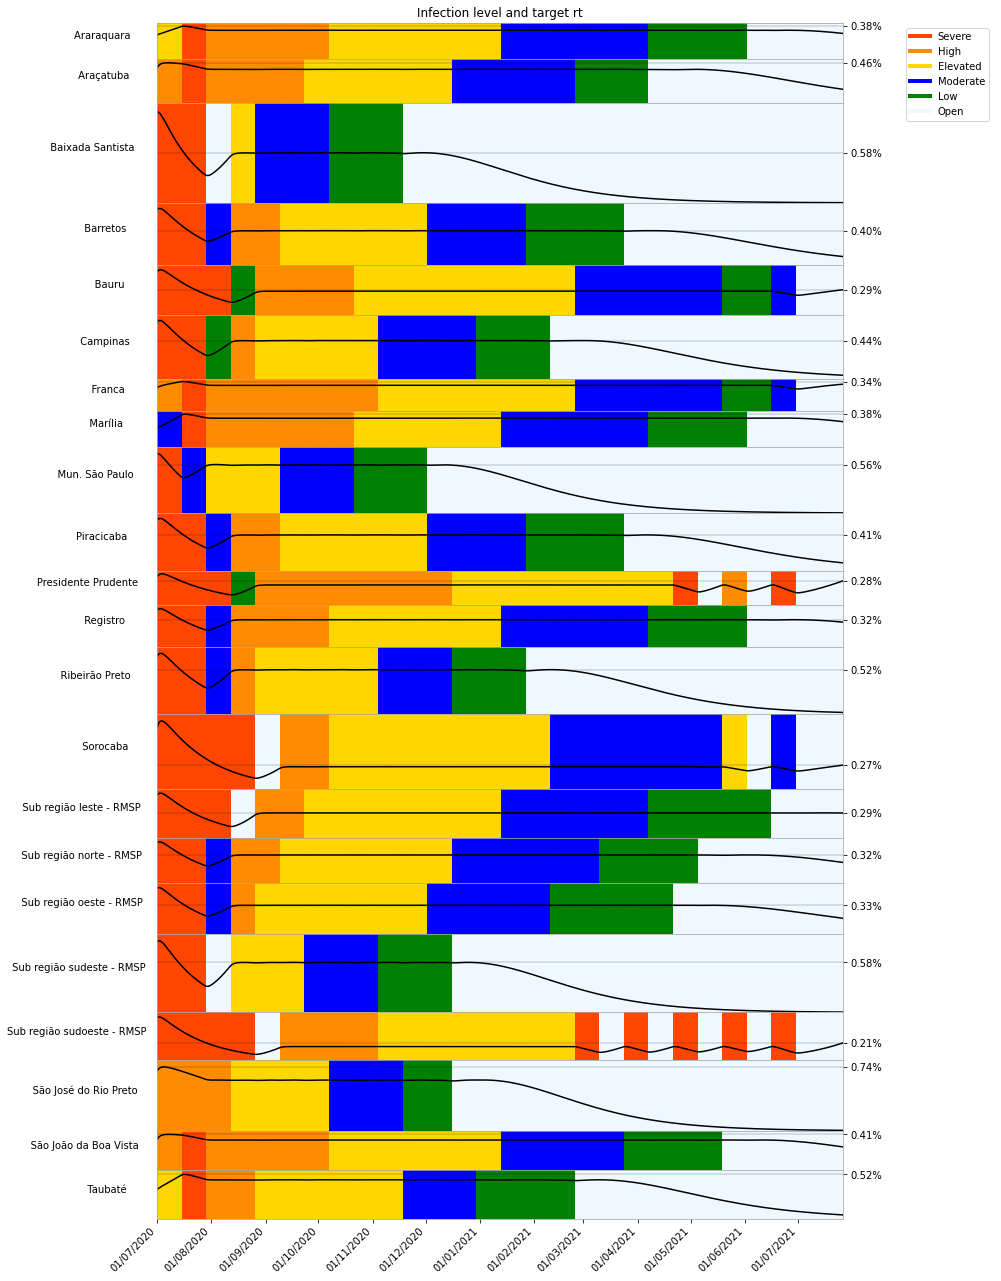

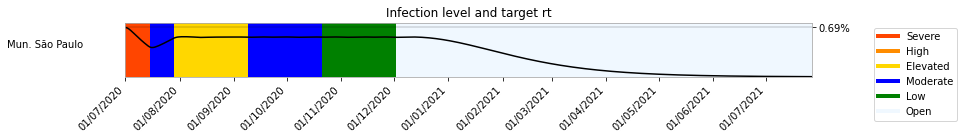

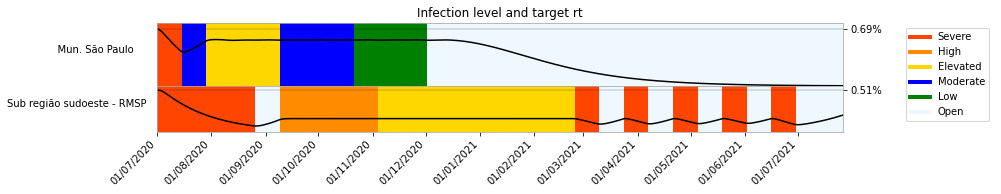

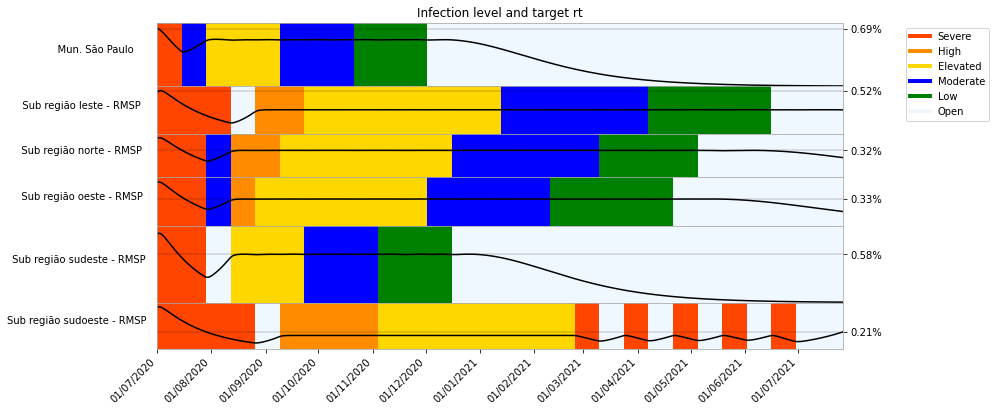

In [8]:
%%time
basic_prm["alternate"] = 0.0
result_file = "results/window_14_noalt_nomobility.csv"
figure_file = "results/window_14_noalt_nomobility.png"
run_a_test(basic_prm, result_file, figure_file, cities_data, M, target, force_dif)


## Case 2: 14 day window, no alternation, with mobility

In [9]:
# Define mobility matrix (full connection)
M = prepare_data.convert_mobility_matrix_and_save(cities_data, max_neighbors=22, drs=True)
M.loc["Mun. São Paulo", "Sub região sudoeste - RMSP"], M.loc["Sub região sudoeste - RMSP", "Mun. São Paulo"]

(0.1256771426008755, 0.013803152552960525)

Checking if initial hammer is long enough...

Number of iterations: 5
Total time: 3.276300005003577 s

Hammer data
                            duration  level
Araraquara                         0    0.8
Araçatuba                          0    0.8
Baixada Santista                  28    0.8
Barretos                          28    0.8
Bauru                             42    0.8
Campinas                          28    0.8
Franca                             0    0.8
Marília                            0    0.8
Mun. São Paulo                    28    0.8
Piracicaba                        28    0.8
Presidente Prudente               42    0.8
Registro                          28    0.8
Ribeirão Preto                    28    0.8
Sorocaba                          56    0.8
Sub região leste - RMSP           28    0.8
Sub região norte - RMSP           28    0.8
Sub região oeste - RMSP           28    0.8
Sub região sudeste - RMSP         28    0.8
Sub região sudoeste - RMSP        42    0.8
São J

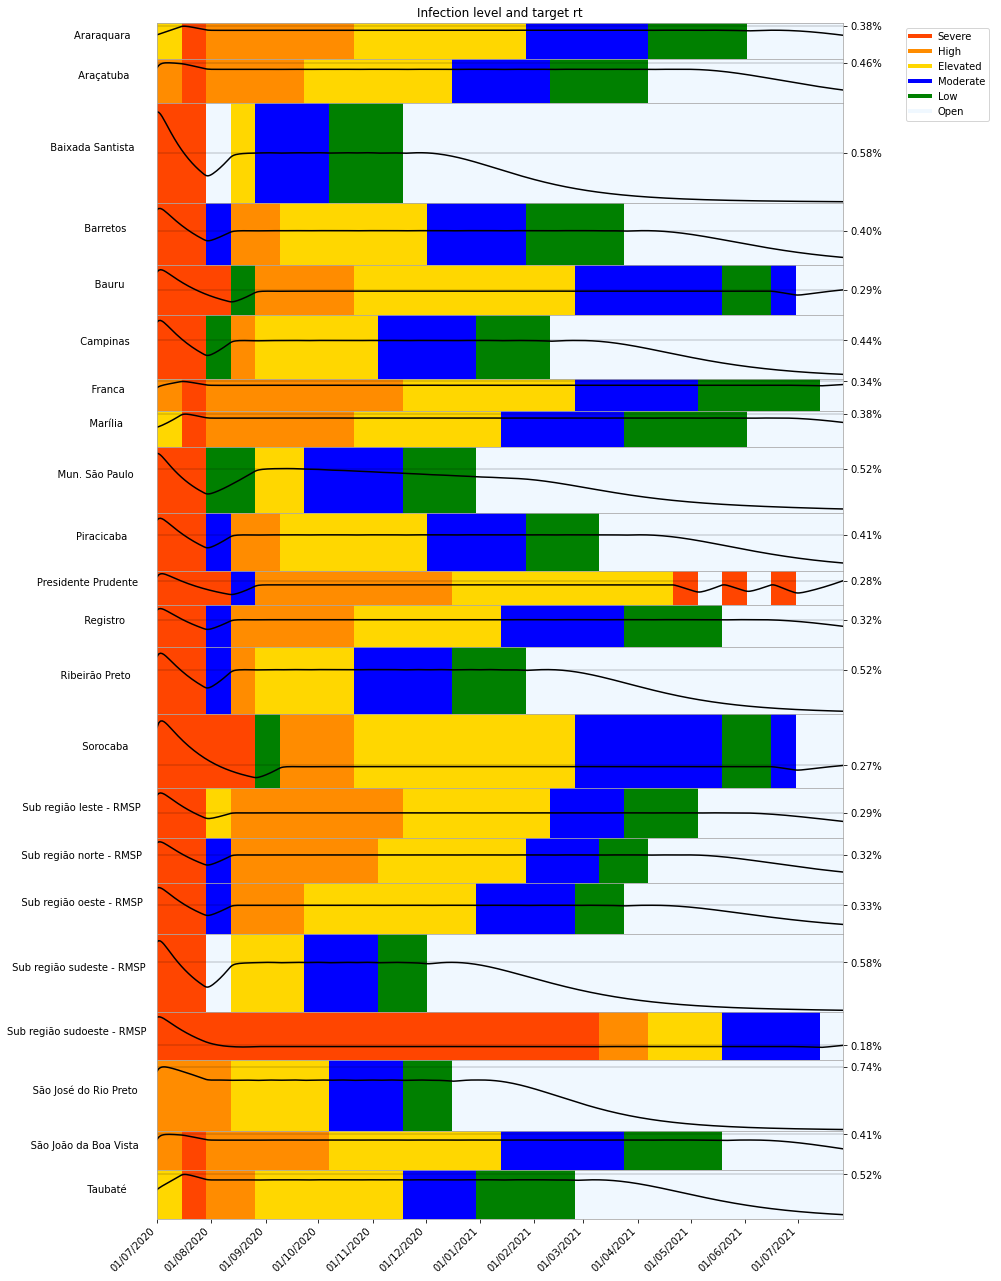

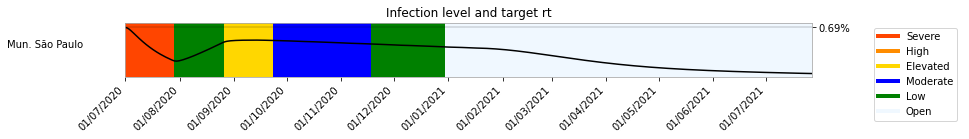

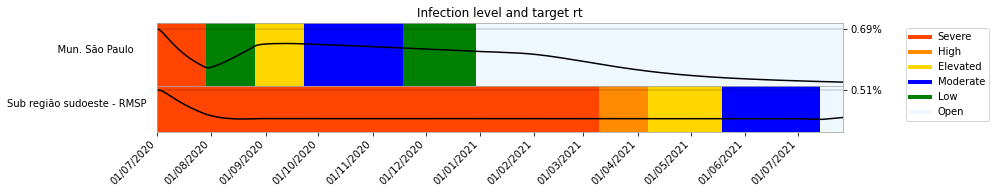

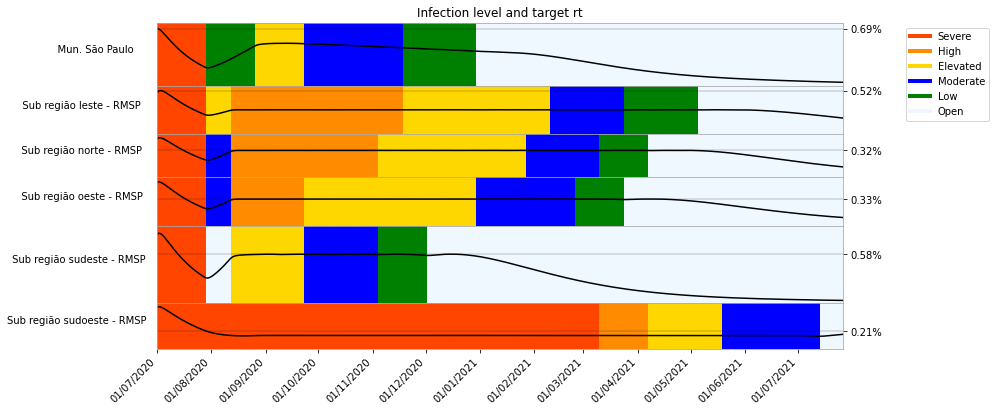

In [10]:
%%time
basic_prm["alternate"] = 0.0
result_file = "results/window_14_noalt_withmobility.csv"
figure_file = "results/window_14_noalt_withmobility.png"
run_a_test(basic_prm, result_file, figure_file, cities_data, M, target, force_dif)

## Case 3: 14 day window, with alternation, with mobility

In [11]:
# Start searching for when the "no alternation" solution decided for full opening.
results = pd.read_csv("results/window_14_noalt_withmobility.csv")
results = results[results["Variable"] == "rt"]
results.drop(["Variable"], axis=1, inplace=True)
results.set_index("City", inplace=True)

def find_last_opening(rts, rep):
    """Find the first moment where the decision of the nonalternating solution is
    to fully open the region.
    """
    rts = rts.values.copy()
    rts[rts < 0.95*rep] = 0.0
    return len(rts) - rts[::-1].argmin() + 1

# Turn off alternation after two windows after the time needed for opening.
for i in range(len(results.index)):
    opening = find_last_opening(results.iloc[i,:], basic_prm["rep"])
    force_dif[i, opening + 2*int(basic_prm["window"]):] = 0.0
    

Checking if initial hammer is long enough...

Number of iterations: 5
Total time: 3.178130163010792 s

Hammer data
                            duration  level
Araraquara                         0    0.8
Araçatuba                          0    0.8
Baixada Santista                  28    0.8
Barretos                          28    0.8
Bauru                             42    0.8
Campinas                          28    0.8
Franca                             0    0.8
Marília                            0    0.8
Mun. São Paulo                    28    0.8
Piracicaba                        28    0.8
Presidente Prudente               42    0.8
Registro                          28    0.8
Ribeirão Preto                    28    0.8
Sorocaba                          56    0.8
Sub região leste - RMSP           28    0.8
Sub região norte - RMSP           28    0.8
Sub região oeste - RMSP           28    0.8
Sub região sudeste - RMSP         28    0.8
Sub região sudoeste - RMSP        42    0.8
São J

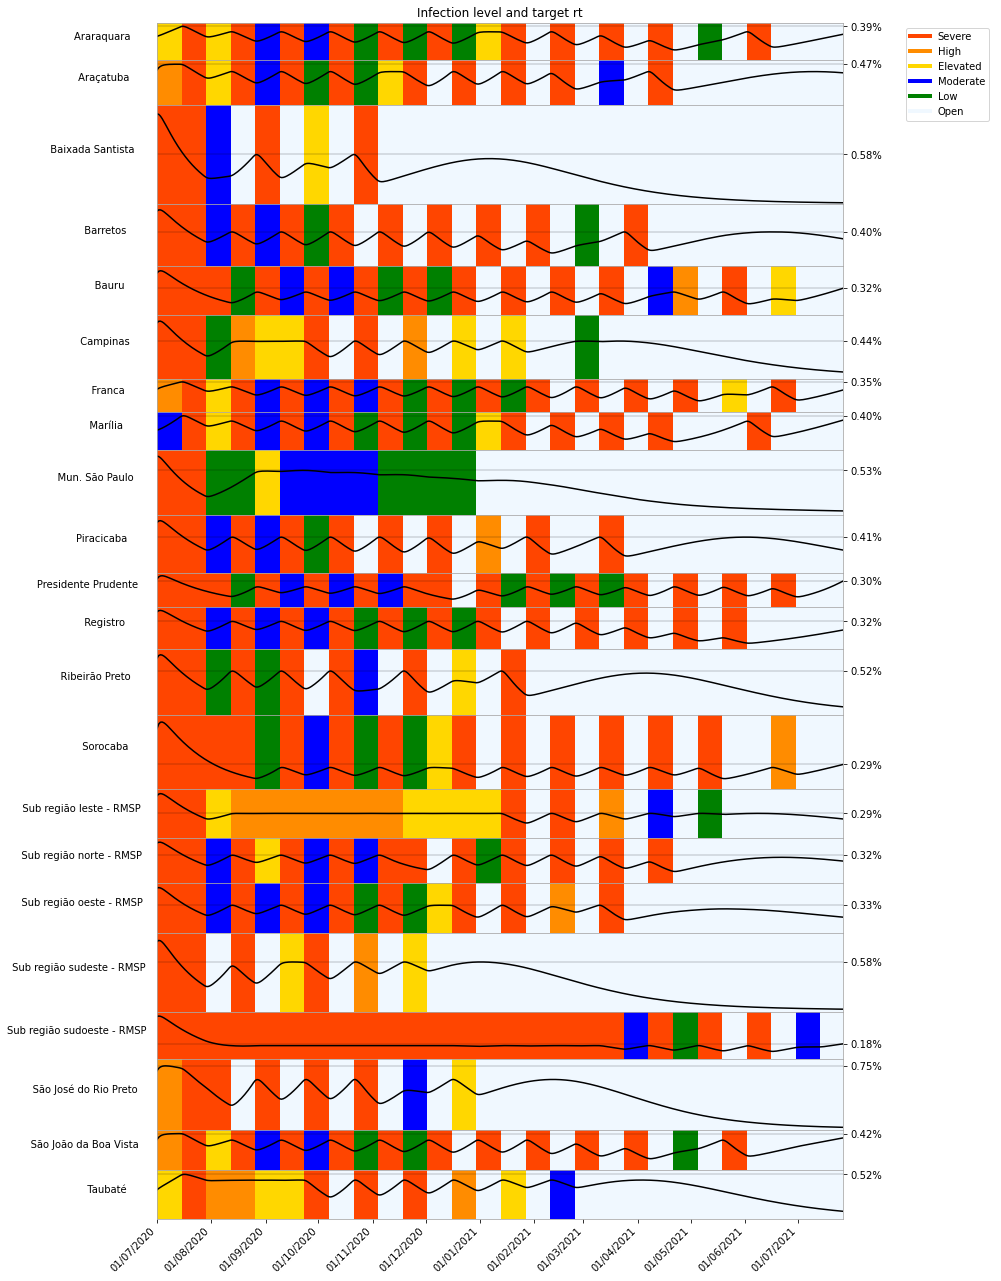

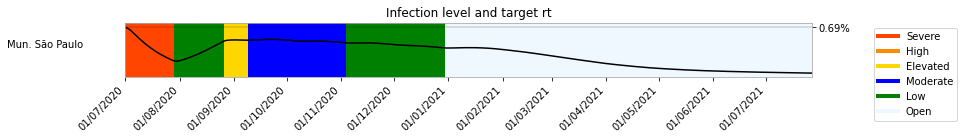

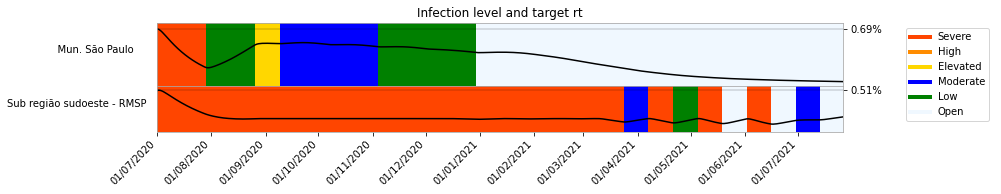

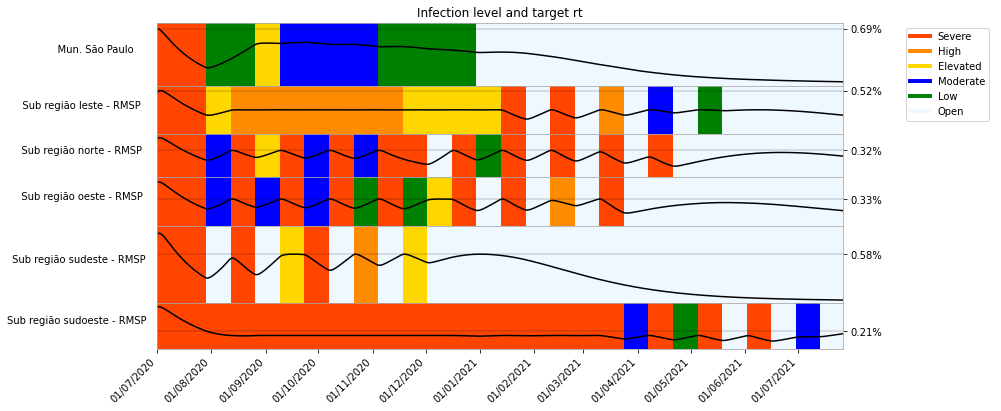

In [12]:
%%time
# Set up alternation weight
basic_prm["alternate"] = 1.0
result_file = "results/window_14_withalt_withmobility.csv"
figure_file = "results/window_14_withalt_withmobility.png"
run_a_test(basic_prm, result_file, figure_file, cities_data, M, target, force_dif)

## Case 4: 14 day window, no alternation, with mobility, ICU shared in metropolitan area from day 1

Checking if initial hammer is long enough...

Number of iterations: 5
Total time: 3.2233944009931292 s

Hammer data
                            duration  level
Araraquara                         0    0.8
Araçatuba                          0    0.8
Baixada Santista                  28    0.8
Barretos                          28    0.8
Bauru                             42    0.8
Campinas                          28    0.8
Franca                             0    0.8
Marília                            0    0.8
Mun. São Paulo                    28    0.8
Piracicaba                        28    0.8
Presidente Prudente               42    0.8
Registro                          28    0.8
Ribeirão Preto                    28    0.8
Sorocaba                          56    0.8
Sub região leste - RMSP           28    0.8
Sub região norte - RMSP           28    0.8
Sub região oeste - RMSP           28    0.8
Sub região sudeste - RMSP         28    0.8
Sub região sudoeste - RMSP        42    0.8
São 

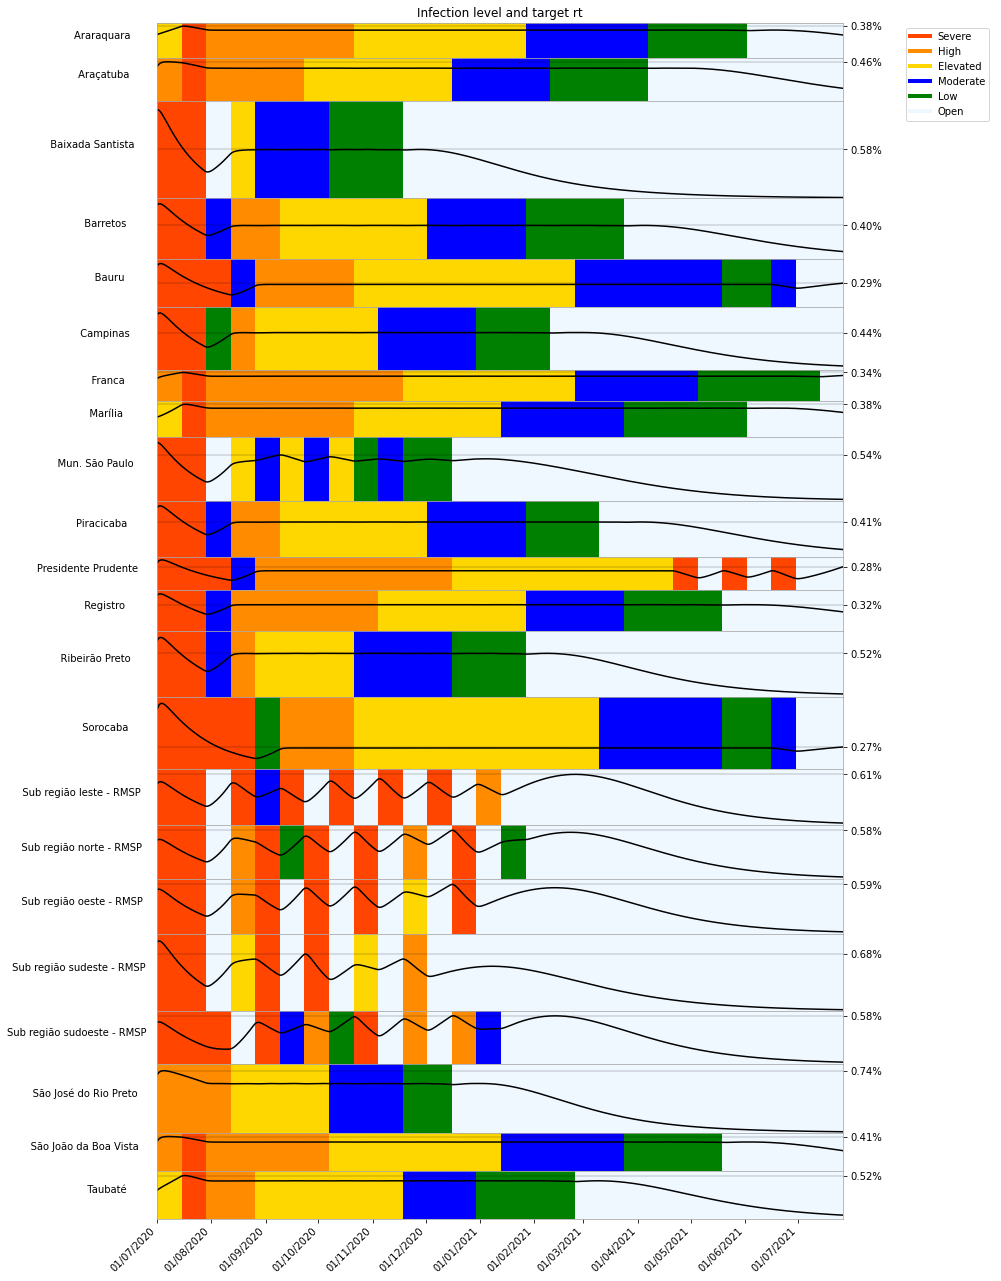

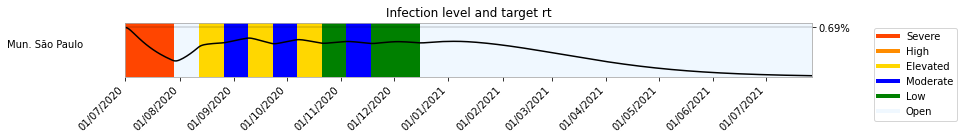

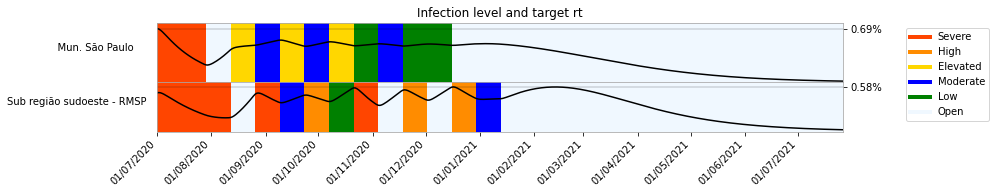

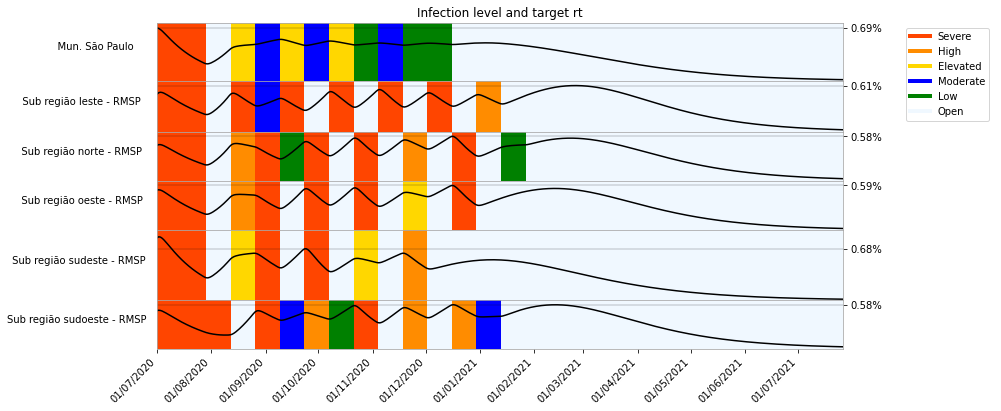

In [13]:
%%time
# Pool with all Sao Paulo metropolitan area
pools = [[1], [2], [3], [4], [5], [6], [7],[8], [c + 1 for c in MASP], [10], [11], 
         [12], [13], [14], [20], [21], [22]]

force_dif =  np.ones((ncities, ndays))
basic_prm["alternate"] = 0.0
result_file = "results/window_14_noalt_withmobility_icushared.csv"
figure_file = "results/window_14_noalt_withmobility_icushared.png"
run_a_test(basic_prm, result_file, figure_file, cities_data, M, target, force_dif, pools)

## Some code to check results

Bad days = 1420/39200 == 3.622449%


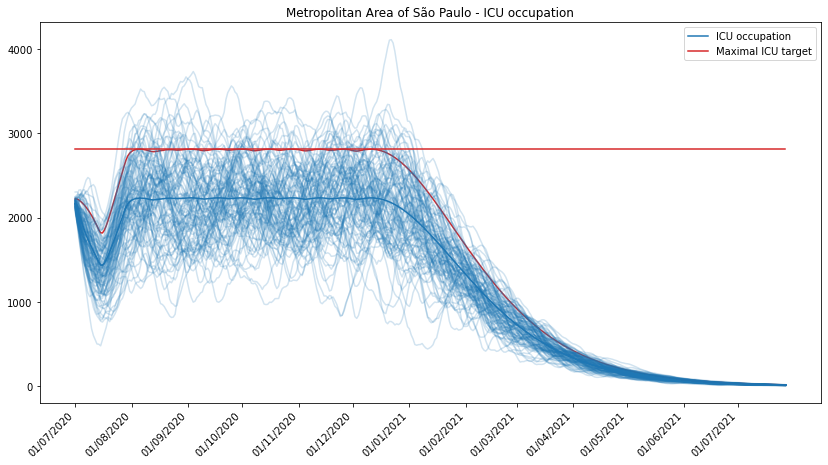

Bad days = 418/39200 == 1.066327%


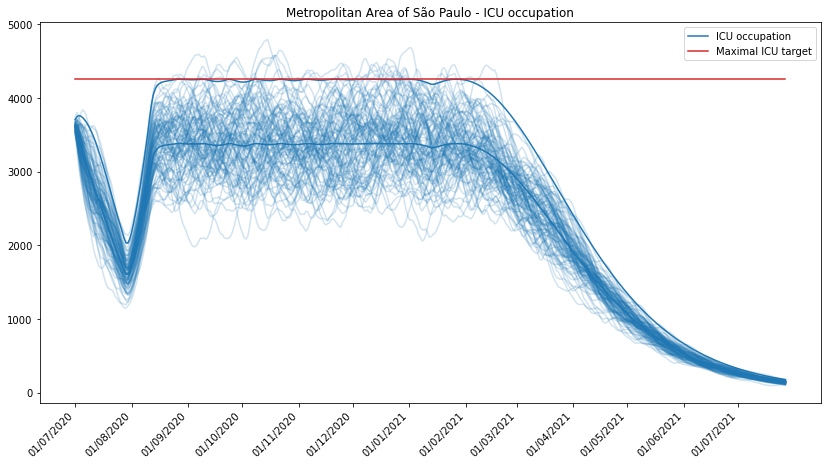

In [30]:
# Configuration
pool = MASP
total_duration = int(basic_prm["ndays"])
first_day = 0 #hammer_data.iloc[pool, 0].min()
last_day = total_duration #first_day + 50 + 1
simulation = pd.read_csv("results/window_14_noalt_withmobility_icushared.csv", index_col=[0, 1])

cities_names = cities_data.iloc[pool].index
population = cities_data["population"]
icu_capacity = cities_data["icu_capacity"]
total_icus = np.array([(target.loc[c]*population.loc[c]*icu_capacity.loc[c]).values for c in cities_names]).sum(axis=0)
total_icus = total_icus[first_day:last_day]

# Plot mean 
c = cities_names[0]
icus = simulation.loc[c, "mean_used_icu"]
for c in cities_names[1:]:
    icus += simulation.loc[c, "mean_used_icu"]
plt.plot(icus[first_day:last_day], color="C0", label="ICU occupation")

# Plot upper bound
c = cities_names[0]
icus = simulation.loc[c, "upper_used_icu"]
for c in cities_names[1:]:
    icus += simulation.loc[c, "upper_used_icu"]
plt.plot(icus[first_day:last_day], label="", color="C0")

# Make random simulations
time_series = run_robot.SimpleTimeSeries(*cities_data.iloc[pool[0], 7:-2])
total_days = 0
bad_days = 0
for i in range(100):
    total_days += last_day - first_day
    need_icu = time_series.simulate(total_duration, True)
    used_icus = simulation.loc[cities_names[0], "i"]*need_icu*population[cities_names[0]]
    for c in cities_names[1:]:
        # TODO: Delete below
        need_icu = time_series.simulate(total_duration, True)
        used_icus += simulation.loc[c, "i"]*need_icu*population[c]
    used_icus *= basic_prm["time_icu"]/basic_prm["tinf"]
    used_icus = used_icus[first_day:last_day]
    bad_days += (used_icus > total_icus).sum()
    plt.plot(used_icus, label="", alpha=0.2, color="C0")

print(f"Bad days = {bad_days:d}/{total_days:d} == {bad_days / total_days * 100:f}%")

# Plot results
import matplotlib.pylab as plt
plt.plot(total_icus, color="C3", label="Maximal ICU target")
start_date = pd.Timestamp(cities_data["start_date"][0]) + first_day*pd.to_timedelta("1D")
ticks = pd.date_range(start_date, start_date + (last_day - first_day)*pd.to_timedelta("1D"), freq="1MS")
ticks = list(ticks)
if ticks[0] <= start_date + pd.to_timedelta("10D"):
    ticks[0] = start_date
else:
    ticks = [start_date] + ticks
plt.gca().set_xticks([(i - start_date).days for i in ticks])
labels = [i.strftime('%d/%m/%Y') for i in ticks]
plt.gca().set_xticklabels(labels, rotation=45, ha='right')
plt.legend()
plt.title("Metropolitan Area of São Paulo - ICU occupation")
plt.savefig("results/icu_usage_with_mobility_sharing.png", dpi=150, bbox_inches='tight')

## Scratch area, you can ignore

352316 obbeyed to upper bound among 392000 samples, that is 89.88%, confidence level = 90.0%.


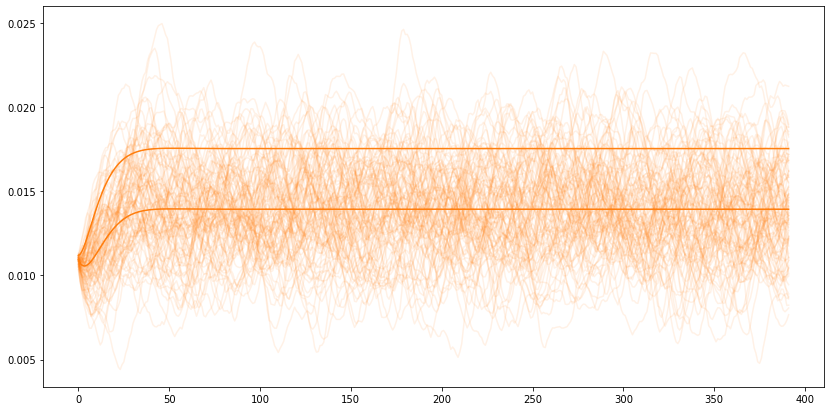

In [15]:
c = MASP[0]
time_series_data = cities_data.iloc[c, 7:-2]
confidence = cities_data.iloc[c, -2]
need_icu, upper_bound = get_rho_icu(ndays, time_series_data, confidence, True)
plt.plot(need_icu, color="C1")
plt.plot(upper_bound, color="C1")

#plt.plot(real_data_sp,color="C3")
time_series = run_robot.SimpleTimeSeries(*time_series_data)
for i in range(100):
    time_series.reset()
    random_traj = [time_series.iterate(random=True) for i in range(ndays)]
    plt.plot(random_traj, color="C1", alpha=0.1)

In [16]:
e_icu_interior, upper_interior = get_rho_icu(ndays, ts_notsp_7, 0.9, True)
e_icu_masp, upper_masp = get_rho_icu(ndays, ts_sp_7, 0.9, True)
pre_df = {
    "SP rho_icu": e_icu_masp, "SP upper bound": upper_masp, 
    "Interior rho_icu": e_icu_interior, "Interior upper bound": upper_interior
}
df = pd.DataFrame(pre_df)
df.to_csv("rho_icu.csv")
df


NameError: name 'ts_notsp_7' is not defined